In [1]:
pip install webdriver_manager

Note: you may need to restart the kernel to use updated packages.


In [2]:
from selenium import webdriver ## 브라우저를 제어하기 위한 모듈
from webdriver_manager.chrome import ChromeDriverManager ## 크롬 드라이버를 자동으로 설치해주는 모듈
from selenium.webdriver.chrome.service import Service as ChromeService ## 크롬 브라우저 제어
from selenium.webdriver.support.wait import WebDriverWait ## 웹 페이지가 로딩될 때까지 대기하기 위한 모듈
from selenium.webdriver.support import expected_conditions as EC ## 대기 조건을 설정하기 위한 모듈
from selenium.webdriver.common.by import By ## 웹 요소를 선택하기 위한 모듈
from selenium.webdriver.common.keys import Keys ## 키보드 입력을 위한 모듈

## 크롬 옵션을 설정하기 위한 모듈
options = webdriver.ChromeOptions()

driver = webdriver.Chrome(
    service=ChromeService(ChromeDriverManager().install()), options=options
) ## 크롬드라이버를 설치하고 옵션을 적용하여 실행

In [3]:
## user-agent 확인
driver.get("https://www.whatismybrowser.com/detect/what-is-my-user-agent")

In [4]:
driver.quit() ## 브라우저 종료

### User-Agent 옵션 변경

In [5]:
pip install user_agent

Note: you may need to restart the kernel to use updated packages.


In [6]:
from user_agent import generate_user_agent, generate_navigator
user_agent = generate_user_agent()
user_agent

'Mozilla/5.0 (X11; Ubuntu; Linux i686; rv:46.0) Gecko/20100101 Firefox/46.0'

In [7]:
options = webdriver.ChromeOptions()
options.add_argument(
    f"user-agent={user_agent}"
) ## 가짜 User-Agent 실행 
driver = webdriver.Chrome(
    service=ChromeService(ChromeDriverManager().install()), options=options
) ## 크롬드라이버를 설치하고 옵션을 적용하여 실행
driver.get("https://www.whatismybrowser.com/detect/what-is-my-user-agent")

## Ch1. 구글로 접속하기

In [8]:
from selenium import webdriver ## 브라우저를 제어하기 위한 모듈
from webdriver_manager.chrome import ChromeDriverManager ## 크롬 드라이버를 자동으로 설치해주는 모듈
from selenium.webdriver.chrome.service import Service as ChromeService ## 크롬 브라우저 제어
from selenium.webdriver.support.wait import WebDriverWait ## 웹 페이지가 로딩될 때까지 대기하기 위한 모듈
from selenium.webdriver.support import expected_conditions as EC ## 대기 조건을 설정하기 위한 모듈
from selenium.webdriver.common.by import By ## 웹 요소를 선택하기 위한 모듈
from selenium.webdriver.common.keys import Keys ## 키보드 입력을 위한 모듈
from user_agent import generate_user_agent, generate_navigator
user_agent = generate_user_agent()
print("이번 User-Agent:", user_agent)

options = webdriver.ChromeOptions()

## ✅ User-Agent가 변경될때마다 class명이 변경되는 경우가 있음
## 가짜 User-Agent 실행 
user_agent = '''Mozilla/5.0 (Windows NT 6.2; WOW64; rv:45.0) Gecko/20100101 Firefox/45.0'''
options.add_argument(
    f"user-agent={user_agent}"
) 


driver = webdriver.Chrome(
    service=ChromeService(ChromeDriverManager().install()), options=options
) ## 크롬드라이버를 설치하고 옵션을 적용하여 실행
driver.get("https://google.com")

이번 User-Agent: Mozilla/5.0 (X11; Ubuntu; Linux i686 on x86_64; rv:46.0) Gecko/20100101 Firefox/46.0


In [9]:
### XPATH로 요소 찾기
### 요소가 보일때까지 대기
waiting_searchbar = WebDriverWait(driver, 10).until(
    EC.presence_of_element_located((By.XPATH, "/html/body/center/form/table/tbody/tr/td[2]/div/div/input"))
)

search_bar = driver.find_element(By.XPATH, "/html/body/center/form/table/tbody/tr/td[2]/div/div/input")

X-path 확인

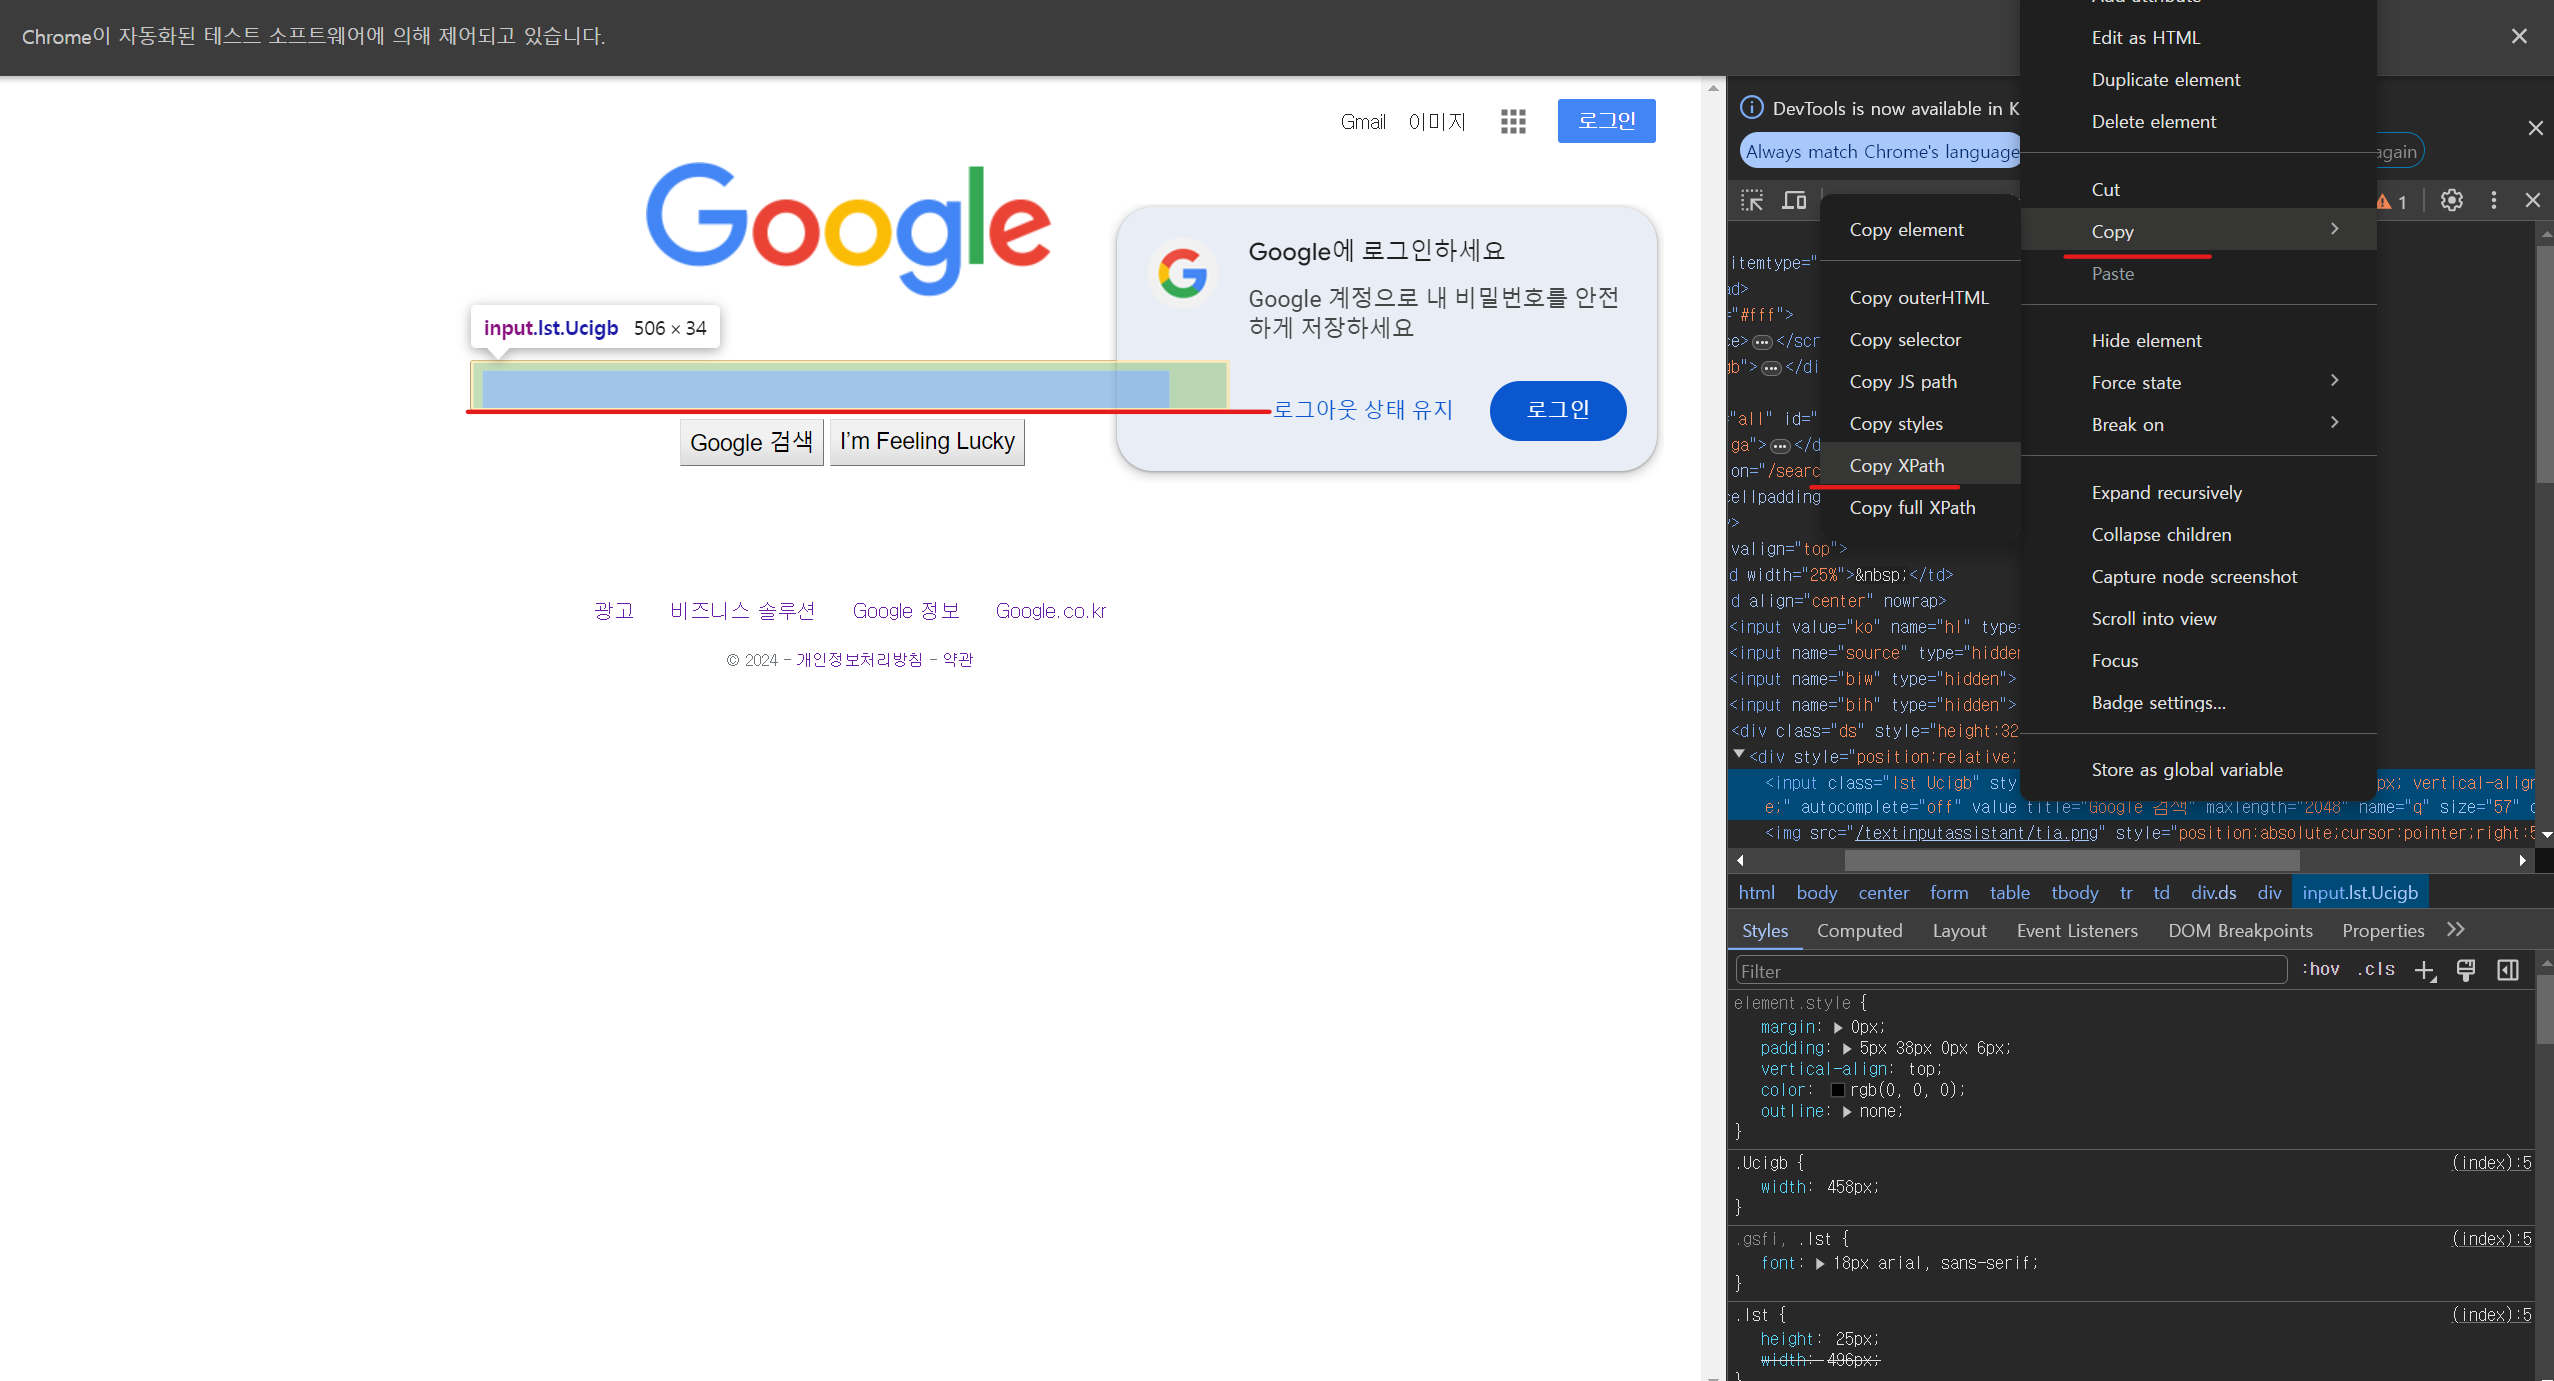

In [10]:
## 요소를 찾았으면 검색어 입력 -> 여기서는 파이썬 입력한 것임
search_bar.send_keys("Python")

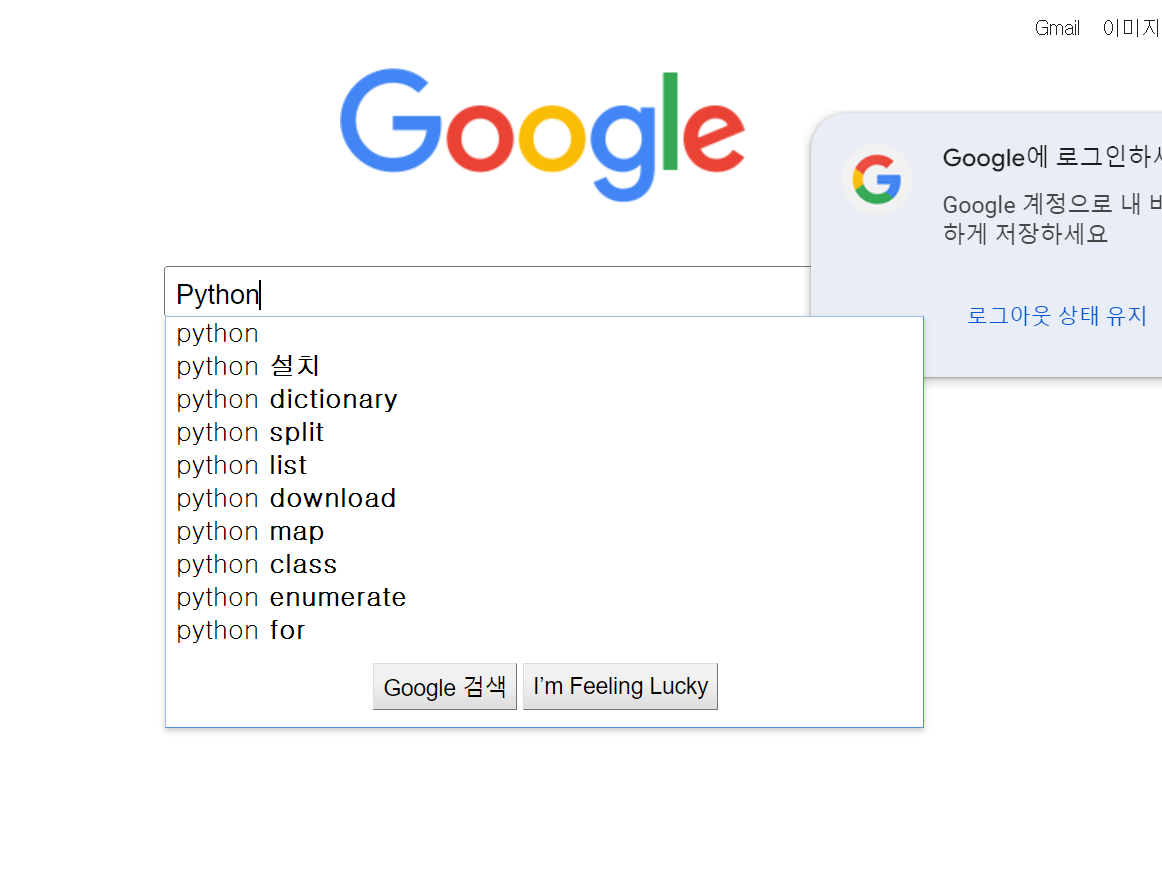

In [11]:
## 엔터키 입력
search_bar.send_keys(Keys.ENTER)

In [12]:
## 검색결과 페이지가 로딩될때까지 대기
WebDriverWait(driver, 20).until(
    EC.presence_of_element_located((By.CLASS_NAME, "egMi0"))
)

## 검색결과
search_results = driver.find_elements(By.CLASS_NAME, "egMi0")

In [13]:
len(search_results)

7

### Ch1-1. 데이터 파싱하기
- WebElement : 웹페이지에 있는 요소를 의미함
- https://selenium-python.readthedocs.io/

In [14]:
for idx, result in enumerate(search_results):
    title = result.find_element(By.TAG_NAME, "h3")
    
    if title:
        print("Title:", title.text)
    else:
        print("Title: None")

Title: Welcome to Python.org
Title: Python - 나무위키
Title: 1. 파이썬 시작하기 - 왕초보를 위한 Python: 쉽게 풀어 쓴 기초 문법과 ...
Title: Python란 무엇인가요? - Python 언어 설명 - Amazon AWS
Title: Python Tutorial - W3Schools
Title: 파이썬 - 위키백과, 우리 모두의 백과사전
Title: python/cpython: The Python programming language - GitHub


In [15]:
## 검색결과 페이지가 로딩될때까지 대기
WebDriverWait(driver, 20).until(
    EC.presence_of_element_located((By.CLASS_NAME, "Gx5Zad"))
)

## 스크랩 부분
screenshot_results = driver.find_elements(By.CLASS_NAME, "Gx5Zad")
screenshot_results

[<selenium.webdriver.remote.webelement.WebElement (session="e6dc7d17a7317015e13085893cba7deb", element="f.BC1472D4E0CCC9F3C24E0B08DB7136AE.d.490A29FEA42D1C31A85AD5C7DBF642B7.e.34")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e6dc7d17a7317015e13085893cba7deb", element="f.BC1472D4E0CCC9F3C24E0B08DB7136AE.d.490A29FEA42D1C31A85AD5C7DBF642B7.e.35")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e6dc7d17a7317015e13085893cba7deb", element="f.BC1472D4E0CCC9F3C24E0B08DB7136AE.d.490A29FEA42D1C31A85AD5C7DBF642B7.e.36")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e6dc7d17a7317015e13085893cba7deb", element="f.BC1472D4E0CCC9F3C24E0B08DB7136AE.d.490A29FEA42D1C31A85AD5C7DBF642B7.e.37")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e6dc7d17a7317015e13085893cba7deb", element="f.BC1472D4E0CCC9F3C24E0B08DB7136AE.d.490A29FEA42D1C31A85AD5C7DBF642B7.e.38")>,
 <selenium.webdriver.remote.webelement.WebElement (session="e6dc7d17a7317015e13085893

In [16]:
import time
for idx, i in enumerate(screenshot_results):
    time.sleep(0.5)
    if i.get_attribute("class") == "Gx5Zad fP1Qef xpd EtOod pkphOe":
        time.sleep(0.5)
        screen = i.screenshot(f"./screentshots/{idx}.png")

In [17]:
%pwd

'c:\\Users\\USER\\projects\\data_study'

In [18]:
from selenium import webdriver ## 브라우저를 제어하기 위한 모듈
from webdriver_manager.chrome import ChromeDriverManager ## 크롬 드라이버를 자동으로 설치해주는 모듈
from selenium.webdriver.chrome.service import Service as ChromeService ## 크롬 브라우저 제어
from selenium.webdriver.support.wait import WebDriverWait ## 웹 페이지가 로딩될 때까지 대기하기 위한 모듈
from selenium.webdriver.support import expected_conditions as EC ## 대기 조건을 설정하기 위한 모듈
from selenium.webdriver.common.by import By ## 웹 요소를 선택하기 위한 모듈
from selenium.webdriver.common.keys import Keys ## 키보드 입력을 위한 모듈
import time
from user_agent import generate_user_agent, generate_navigator
user_agent = generate_user_agent()
print("이번 User-Agent:", user_agent)

options = webdriver.ChromeOptions()

## ✅ User-Agent가 변경될때마다 class명이 변경되는 경우가 있음
## 가짜 User-Agent 실행 
user_agent = '''Mozilla/5.0 (Windows NT 6.2; WOW64; rv:45.0) Gecko/20100101 Firefox/45.0'''
options.add_argument(
    f"user-agent={user_agent}"
) 


driver = webdriver.Chrome(
    service=ChromeService(ChromeDriverManager().install()), options=options
) ## 크롬드라이버를 설치하고 옵션을 적용하여 실행
driver.get("https://news.naver.com/")

이번 User-Agent: Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:47.0) Gecko/20100101 Firefox/47.0


In [19]:
driver.maximize_window()

In [20]:
## 브라우저의 Y축 길이를 가져옴
browser_height = driver.execute_script("return window.innerHeight")
browser_height

880

In [21]:
## 스크롤 가능한 Y축 길이 측정
total_height = driver.execute_script("return document.body.scrollHeight")
total_height

5387

In [22]:
## 브라우저 최상단으로 이동
driver.execute_script("window.scrollTo(0, 0);")

In [23]:
driver.maximize_window()
## 브라우저의 Y축 길이를 가져옴
browser_height = driver.execute_script("return window.innerHeight")
## 스크롤 가능한 Y축 길이 측정
total_height = driver.execute_script("return document.body.scrollHeight")
scroll_count = total_height // browser_height + 1

In [24]:
for i in range(scroll_count):
    cnt = i +1
    print("스크롤 횟수:", scroll_count, "현재", cnt )
    driver.execute_script(f"window.scrollTo(0, {browser_height*i});")
    time.sleep(2)

스크롤 횟수: 7 현재 1
스크롤 횟수: 7 현재 2
스크롤 횟수: 7 현재 3
스크롤 횟수: 7 현재 4
스크롤 횟수: 7 현재 5
스크롤 횟수: 7 현재 6
스크롤 횟수: 7 현재 7


In [25]:
sizes = [320, 480, 960, 1366, 1920]
## 브라우저의 Y축 길이를 가져옴
browser_height = driver.execute_script("return window.innerHeight")

for size in sizes:    
    time.sleep(1)
    print("브라우저의 Y축 길이:", browser_height)

    ## 브라우저의 크기를 변경
    driver.set_window_size(size, browser_height)
    print("브라우저의 크기 변경:", size, browser_height)
    time.sleep(1)

    ## 브라우저 최상단으로 이동
    driver.execute_script("window.scrollTo(0, 0);")
    time.sleep(1)
    print("브라우저 최상단 이동")

    ## 전체 Y축 길이 측정
    total_height = driver.execute_script("return document.body.scrollHeight")
    print(f"브라우저 크기: x:{size} y:{browser_height}, 전체 Y축 길이: {total_height}")
    scroll_count = total_height // browser_height + 1
    print(f"스크롤 횟수: {scroll_count}")
    
    for i in range(scroll_count):
        cnt = i +1
        print("스크롤 횟수:", scroll_count, "현재", cnt )
        driver.execute_script(f"window.scrollTo(0, {browser_height*i});")
        ## 전체화면 스크린샷 저장
        driver.save_screenshot(f"./screentshots/{size}_{cnt}.png")
        time.sleep(2)

driver.quit()

브라우저의 Y축 길이: 880
브라우저의 크기 변경: 320 880
브라우저 최상단 이동
브라우저 크기: x:320 y:880, 전체 Y축 길이: 5352
스크롤 횟수: 7
스크롤 횟수: 7 현재 1
스크롤 횟수: 7 현재 2
스크롤 횟수: 7 현재 3
스크롤 횟수: 7 현재 4
스크롤 횟수: 7 현재 5
스크롤 횟수: 7 현재 6
스크롤 횟수: 7 현재 7
브라우저의 Y축 길이: 880
브라우저의 크기 변경: 480 880
브라우저 최상단 이동
브라우저 크기: x:480 y:880, 전체 Y축 길이: 5352
스크롤 횟수: 7
스크롤 횟수: 7 현재 1
스크롤 횟수: 7 현재 2
스크롤 횟수: 7 현재 3
스크롤 횟수: 7 현재 4
스크롤 횟수: 7 현재 5
스크롤 횟수: 7 현재 6
스크롤 횟수: 7 현재 7
브라우저의 Y축 길이: 880
브라우저의 크기 변경: 960 880
브라우저 최상단 이동
브라우저 크기: x:960 y:880, 전체 Y축 길이: 3479
스크롤 횟수: 4
스크롤 횟수: 4 현재 1
스크롤 횟수: 4 현재 2
스크롤 횟수: 4 현재 3
스크롤 횟수: 4 현재 4
브라우저의 Y축 길이: 880
브라우저의 크기 변경: 1366 880
브라우저 최상단 이동
브라우저 크기: x:1366 y:880, 전체 Y축 길이: 5556
스크롤 횟수: 7
스크롤 횟수: 7 현재 1
스크롤 횟수: 7 현재 2
스크롤 횟수: 7 현재 3
스크롤 횟수: 7 현재 4
스크롤 횟수: 7 현재 5
스크롤 횟수: 7 현재 6
스크롤 횟수: 7 현재 7
브라우저의 Y축 길이: 880
브라우저의 크기 변경: 1920 880
브라우저 최상단 이동
브라우저 크기: x:1920 y:880, 전체 Y축 길이: 5556
스크롤 횟수: 7
스크롤 횟수: 7 현재 1
스크롤 횟수: 7 현재 2
스크롤 횟수: 7 현재 3
스크롤 횟수: 7 현재 4
스크롤 횟수: 7 현재 5
스크롤 횟수: 7 현재 6
스크롤 횟수: 7 현재 7
